In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
dataset = fetch_california_housing()

In [ ]:
dataset

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
import seaborn as sns

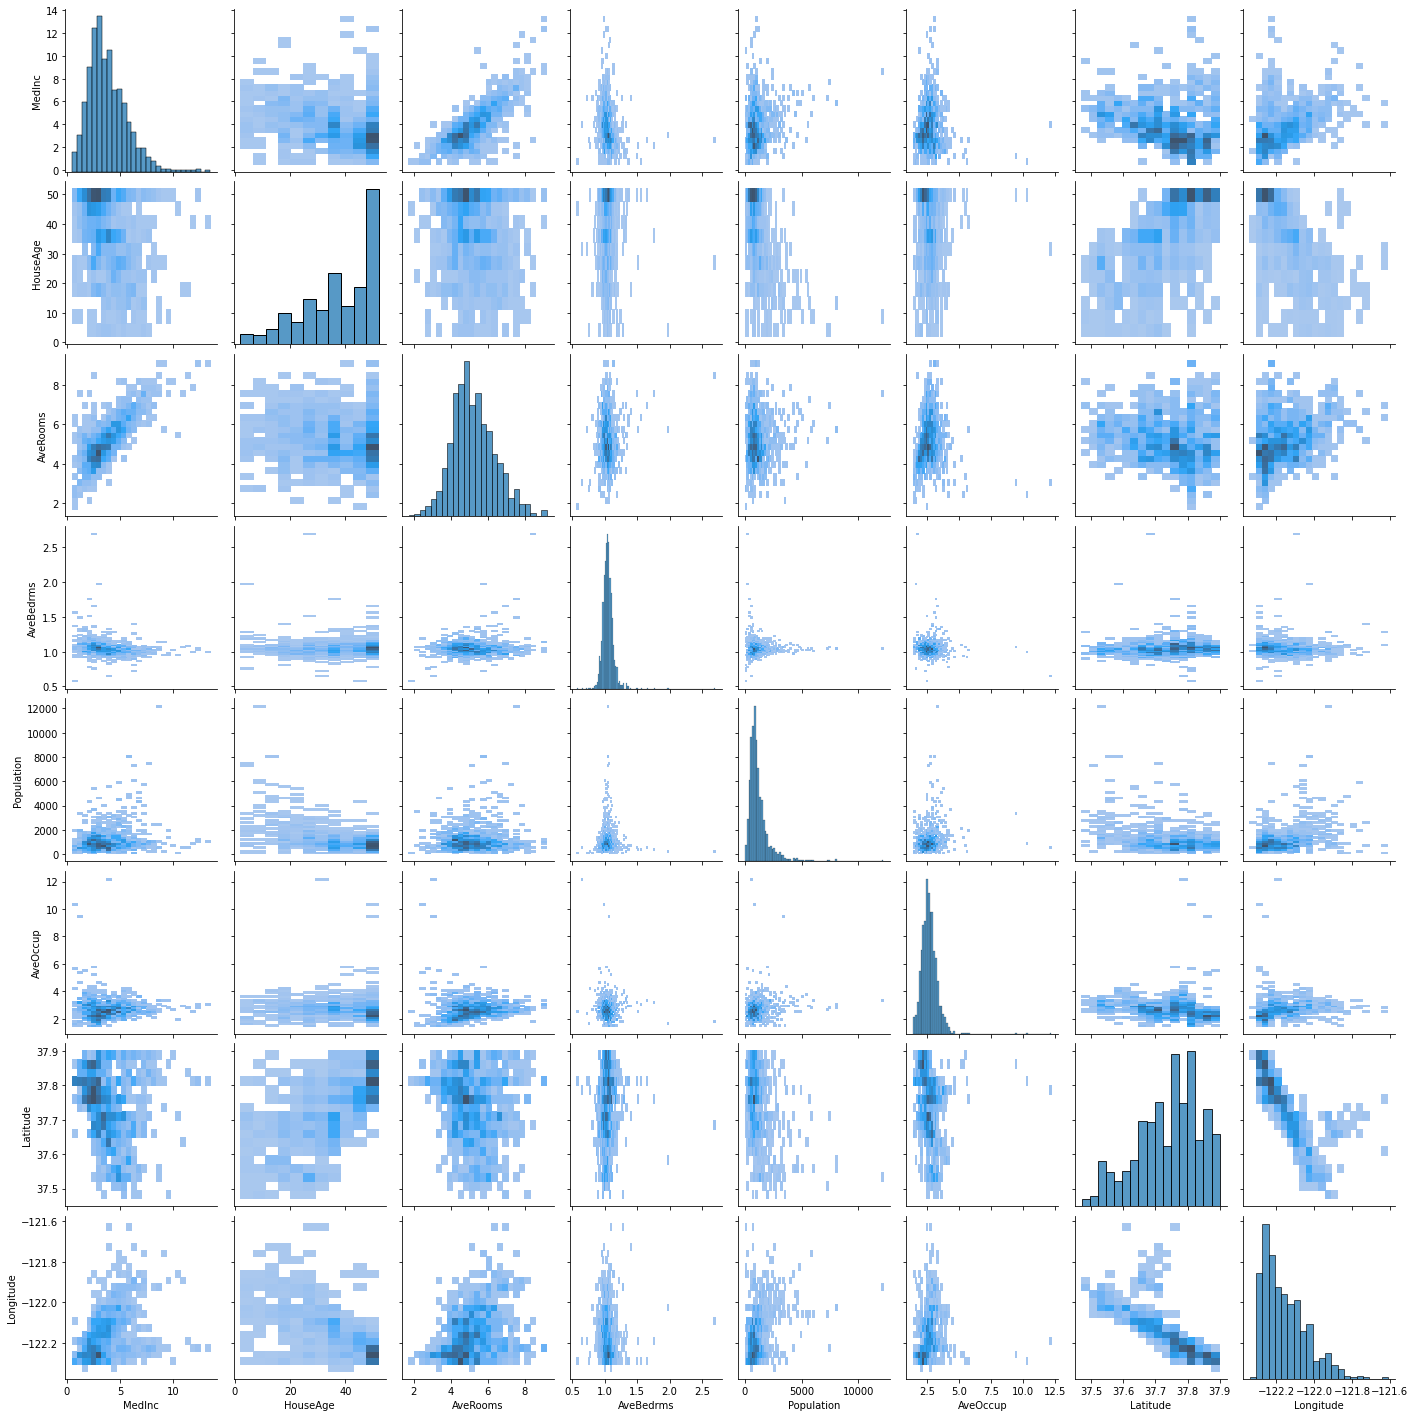

In [ ]:
# seaborn is not efficient, so limiting the plot to the 1st 1000 samples
sns.pairplot(df[:1000], kind='hist')

In [ ]:
x = dataset['data']
y = dataset['target']

In [ ]:
from xgboost import XGBRegressor

In [ ]:
param = {'max_depth':7, 'gamma':5, 'eta':0.2, 'nthread':1, 'objective':'reg:squarederror', 'nestimators':200}


In [ ]:
bst = XGBRegressor(**param)

In [ ]:
bst.fit(x, y, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nestimators=200, nthread=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
preds = bst.predict(x)

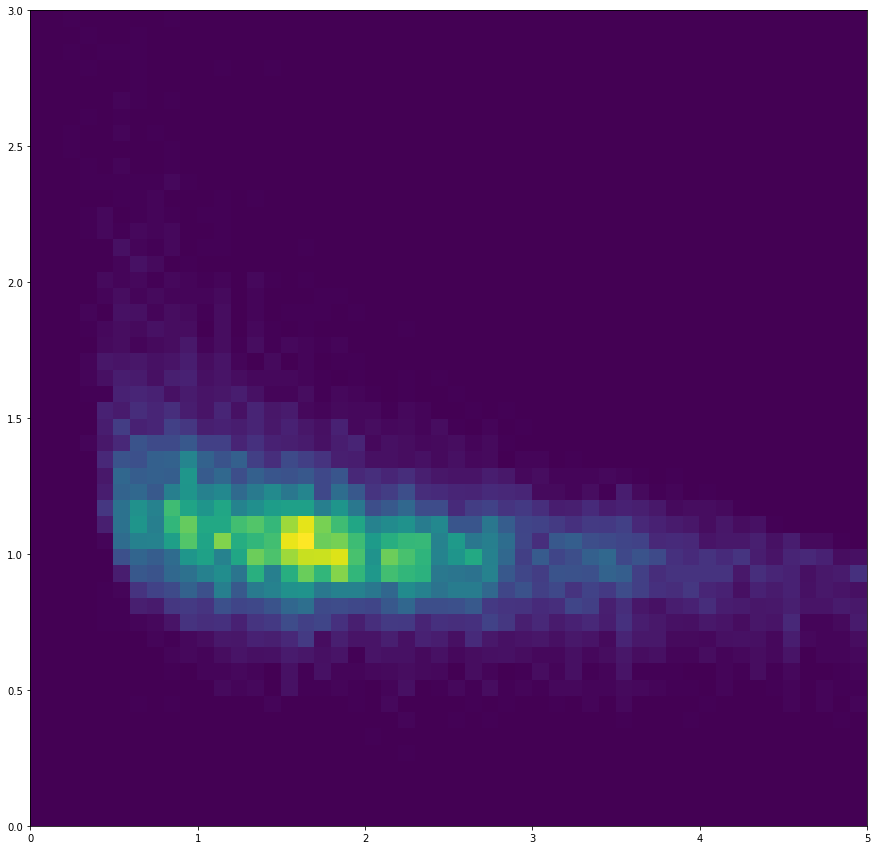

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
_ = plt.hist2d(y, preds/y, bins=(50,50), range=((0,5), (0,3)))


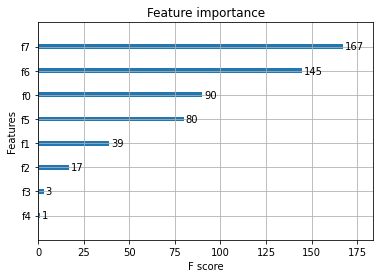

In [ ]:
xgb.plot_importance(bst)

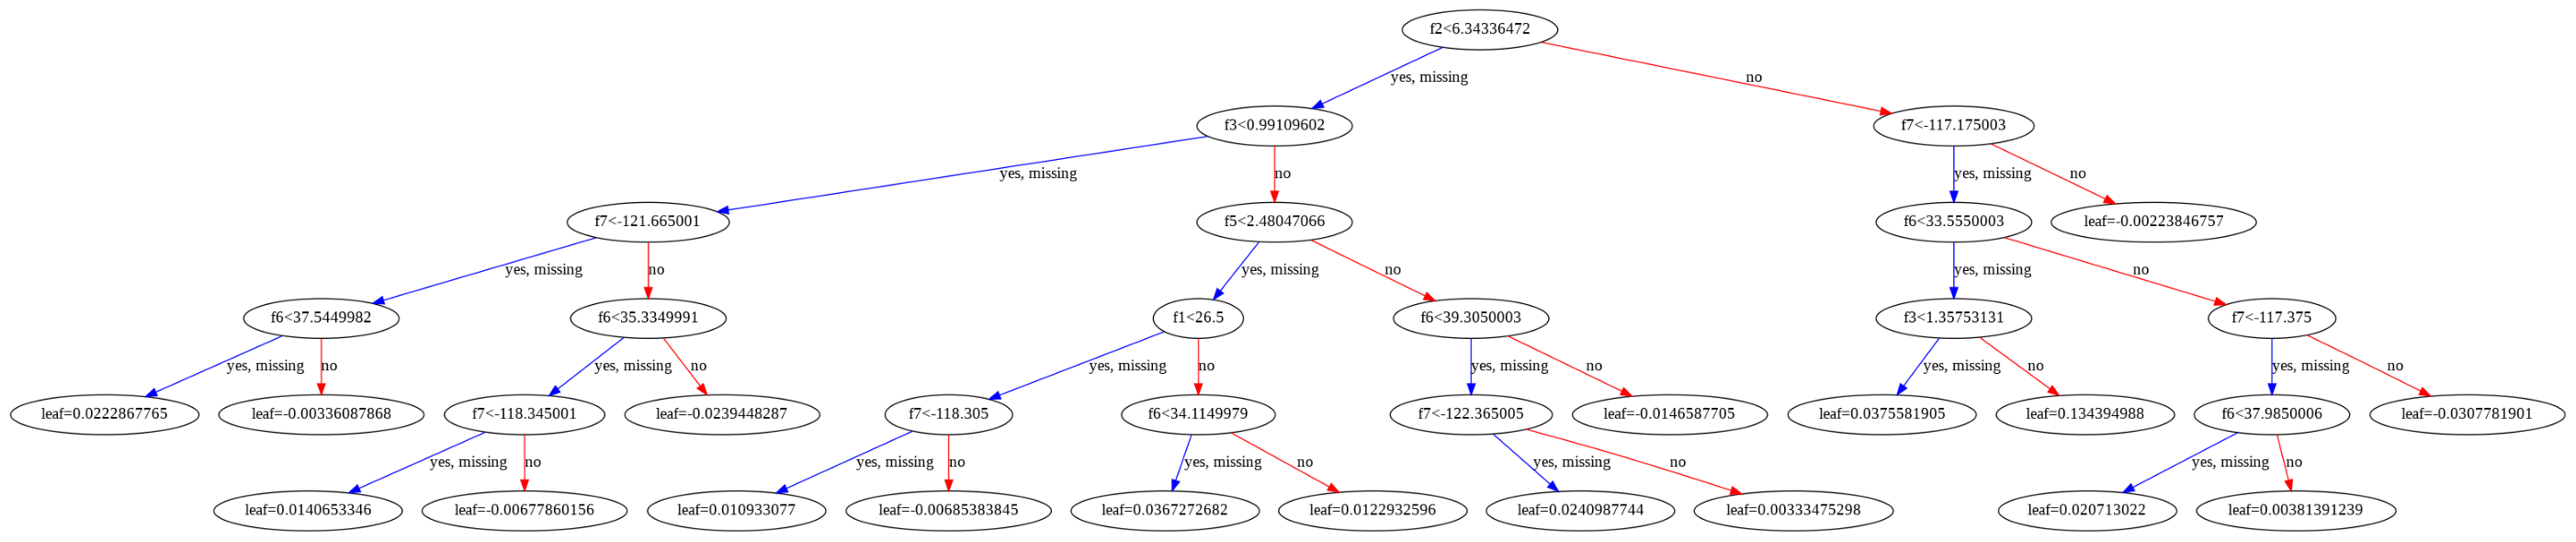

In [ ]:
fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(111)
xgb.plot_tree(bst, ax=ax, num_trees=30)